In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
sns.set()

In [2]:
df = pd.read_csv('adidas.csv')

In [3]:
df.head()

,url,name,sku,selling_price,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,adidas United States,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,adidas United States,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,adidas United States,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             845 non-null    object 
 1   name            845 non-null    object 
 2   sku             845 non-null    object 
 3   selling_price   845 non-null    int64  
 4   original_price  829 non-null    object 
 5   currency        845 non-null    object 
 6   availability    845 non-null    object 
 7   color           845 non-null    object 
 8   category        845 non-null    object 
 9   source          845 non-null    object 
 10  source_website  845 non-null    object 
 11  breadcrumbs     845 non-null    object 
 12  description     845 non-null    object 
 13  brand           845 non-null    object 
 14  images          845 non-null    object 
 15  country         845 non-null    object 
 16  language        845 non-null    object 
 17  average_rating  845 non-null    flo

In [5]:
df.describe()

,selling_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000
mean,53.192899,4.608402,426.178698
std,31.411645,0.293795,1229.158277
min,9.000000,1.000000,1.000000
25%,28.000000,4.500000,19.000000
50%,48.000000,4.700000,68.000000
75%,70.000000,4.800000,314.000000
max,240.000000,5.000000,11750.000000


In [6]:
df.describe(include='object')

,url,name,sku,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,crawled_at
count,845,845,845,829,845,845,845,845,845,845,845,845,845,845,845,845,845
unique,845,431,845,42,1,2,18,3,1,1,22,560,1,845,1,1,845
top,https://www.adidas.com/us/beach-shorts/FJ5089....,ZX 1K Boost Shoes,FJ5089,$65,USD,InStock,White,Shoes,adidas United States,https://www.adidas.com,Women/Clothing,"When running is your sport, there's nothing yo...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,2021-10-23 17:50:17.331255
freq,1,24,1,68,845,842,222,426,845,845,176,8,845,1,845,845,1


In [7]:
# check missing data 
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
    return missing_data

In [8]:
missingdata(df)

,Total,%
original_price,16,1.9
url,0,0.0
breadcrumbs,0,0.0
reviews_count,0,0.0
average_rating,0,0.0
language,0,0.0
country,0,0.0
images,0,0.0
brand,0,0.0
description,0,0.0


In [9]:
df['source'].value_counts() #no new value hence delete it

adidas United States    845
Name: source, dtype: int64

In [10]:
df['currency'].value_counts() # no new value hence delete it

USD    845
Name: currency, dtype: int64

In [11]:
df['url'].head() # no use for us here

0    https://www.adidas.com/us/beach-shorts/FJ5089....
1    https://www.adidas.com/us/five-ten-kestrel-lac...
2    https://www.adidas.com/us/mexico-away-jersey/G...
3    https://www.adidas.com/us/five-ten-hiangle-pro...
4    https://www.adidas.com/us/mesh-broken-stripe-p...
Name: url, dtype: object

In [12]:
df['source_website'].head()
df['source_website'].value_counts() # website is same also no use for us

https://www.adidas.com    845
Name: source_website, dtype: int64

In [13]:
df['brand'].value_counts() # brand is same for evey product

adidas    845
Name: brand, dtype: int64

In [14]:
df['country'].value_counts() # country is same for every product

USA    845
Name: country, dtype: int64

In [15]:
df['language'].value_counts() # language is same so we will drop it

en    845
Name: language, dtype: int64

In [16]:
df['images'].head()

0    https://assets.adidas.com/images/w_600,f_auto,...
1    https://assets.adidas.com/images/w_600,f_auto,...
2    https://assets.adidas.com/images/w_600,f_auto,...
3    https://assets.adidas.com/images/w_600,f_auto,...
4    https://assets.adidas.com/images/w_600,f_auto,...
Name: images, dtype: object

In [17]:
df['sku'].head()

0    FJ5089
1    BC0770
2    GC7946
3    FV4744
4    GM0239
Name: sku, dtype: object

In [18]:
df.drop([ 'brand', 'country', 'language', 'source_website', 'images', 'url', 'sku', 'currency','source', 'crawled_at'], axis=1, inplace=True)

In [19]:
df['original_price'] = df['original_price'].str.split('$')
df['original_price'] = df['original_price'].str[1]

In [20]:
df['Category'] = df['breadcrumbs'].str.split("/")
df['Category'] = df['Category'].str[0]

In [21]:
df['Product_Type'] = df['breadcrumbs'].str.split("/")
df['Product_Type'] = df['Product_Type'].str[1]

In [22]:
df.drop(['breadcrumbs', 'category'], axis=1, inplace=True)

In [23]:
# df['original_price'] = df['original_price'].astype('int64')

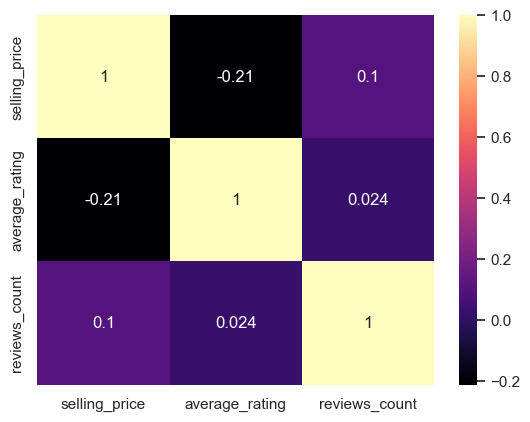

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.show();

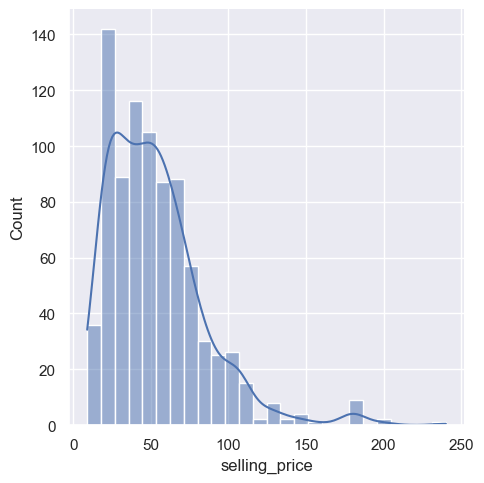

In [25]:
sns.displot(df['selling_price'], kde=True);

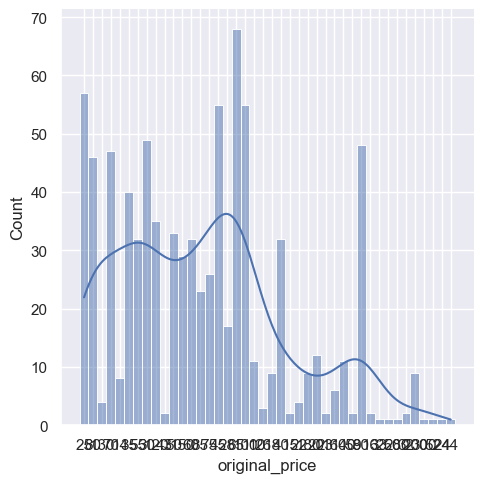

In [26]:
sns.displot(df['original_price'], kde=True);

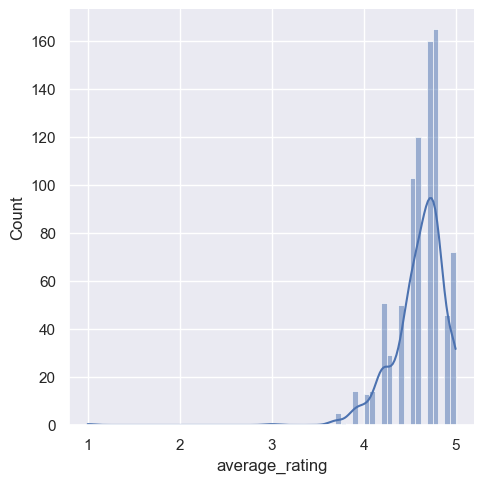

In [27]:
sns.displot(df['average_rating'], kde=True);

In [28]:
df['name'].value_counts()[:15]

ZX 1K Boost Shoes                                  24
ZX 2K Boost Shoes                                  18
Superstar Shoes                                    16
EQ21 Run Shoes                                     13
Racer TR21 Shoes                                   12
ZX 2K Boost 2.0 Shoes                              10
4D Fusio Shoes                                      9
Adilette Comfort Slides                             9
Supernova+ Shoes                                    9
Swift Run X Shoes                                   9
Stan Smith Shoes                                    8
Postmove Shoes                                      8
Response Super 2.0 Shoes                            8
QT Racer 2.0 Shoes                                  7
adidas Sportswear Future Icons Logo Graphic Tee     7
Name: name, dtype: int64

In [29]:
df['availability'].value_counts()

InStock       842
OutOfStock      3
Name: availability, dtype: int64

In [30]:
df['original_price'].replace('NaN', np.NAN, inplace=True)

In [31]:
df['original_price'] = df['original_price'].astype('float')

In [32]:
df['original_price'].fillna(value=df['original_price'].mean(), inplace=True)

In [33]:
# df['Discount'] = df['original_price'] - df['selling_price']
df['Discount_percentage'] = round(((df['original_price'] - df['selling_price']) / (df['original_price']))*100,2)

In [34]:
df['Product_Type'].value_counts()

Shoes          426
Clothing       337
Accessories     82
Name: Product_Type, dtype: int64

In [35]:
df.head()

,name,selling_price,original_price,availability,color,description,average_rating,reviews_count,Category,Product_Type,Discount_percentage
0,Beach Shorts,40,69.008444,InStock,Black,Splashing in the surf. Making memories with yo...,4.5,35,Women,Clothing,42.04
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,69.008444,InStock,Grey,Lace up and get after it. The Five Ten Kestrel...,4.8,4,Women,Shoes,-117.36
2,Mexico Away Jersey,70,69.008444,InStock,White,"Clean and crisp, this adidas Mexico Away Jerse...",4.9,42,Kids,Clothing,-1.44
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,69.008444,InStock,Black,The Hiangle Pro takes on the classic shape of ...,3.7,7,Five Ten,Shoes,-131.86
4,Mesh Broken-Stripe Polo Shirt,65,69.008444,InStock,Blue,Step up to the tee relaxed. This adidas golf p...,4.7,11,Men,Clothing,5.81


In [36]:
df['Product_Type'].value_counts()

Shoes          426
Clothing       337
Accessories     82
Name: Product_Type, dtype: int64

In [37]:
df['Category'].value_counts()

Women         347
Men           285
Kids          101
Originals      58
Training       25
Soccer         12
Swim            7
Running         6
Essentials      2
Five Ten        1
Sportswear      1
Name: Category, dtype: int64

In [38]:
df['color'].value_counts()

White         222
Black         187
Blue          104
Grey           81
Pink           62
Green          59
Purple         31
Red            25
Multicolor     20
Yellow         17
Orange         11
Burgundy        9
Beige           6
Multi           4
Gold            3
Turquoise       2
Silver          1
Brown           1
Name: color, dtype: int64

In [39]:
cols = ['color', 'Category', 'Product_Type','availability']

In [40]:
def onehotencoder(train,cols=[]):
    
    from sklearn.preprocessing import OneHotEncoder
    object_cols=cols
    print(object_cols)
    
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))
    
    # One-hot encoding removed index; put it back
    OH_cols_train.index = train.index
    #OH_cols_test.index = test.index

    ##hack for restoring columns names just like get dummies
    column_name = OH_encoder.get_feature_names(object_cols)
    OH_cols_train.columns = column_name
    #OH_cols_test.columns = column_name
    

    # Remove desired categorical columns (will replace with one-hot encoding)
    num_train = train.drop(object_cols, axis=1)
  

    # Add one-hot encoded columns to numerical/remaining features
    OH_train = pd.concat([num_train, OH_cols_train], axis=1)

    
    
    return OH_train

In [41]:
df = onehotencoder(df, cols = cols)

['color', 'Category', 'Product_Type', 'availability']


In [42]:
df.head()

,name,selling_price,original_price,description,average_rating,reviews_count,Discount_percentage,color_Beige,color_Black,color_Blue,...,Category_Soccer,Category_Sportswear,Category_Swim,Category_Training,Category_Women,Product_Type_Accessories,Product_Type_Clothing,Product_Type_Shoes,availability_InStock,availability_OutOfStock
0,Beach Shorts,40,69.008444,Splashing in the surf. Making memories with yo...,4.5,35,42.04,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,69.008444,Lace up and get after it. The Five Ten Kestrel...,4.8,4,-117.36,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Mexico Away Jersey,70,69.008444,"Clean and crisp, this adidas Mexico Away Jerse...",4.9,42,-1.44,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,69.008444,The Hiangle Pro takes on the classic shape of ...,3.7,7,-131.86,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Mesh Broken-Stripe Polo Shirt,65,69.008444,Step up to the tee relaxed. This adidas golf p...,4.7,11,5.81,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
# df['text'] = df.apply(lambda row: ' '.join ([str(row['description']), str(row['name'])]), axis=1)

In [44]:
# cvectorizer = CountVectorizer(min_df=4, max_features=500000, ngram_range=(1,4))

# cvz_df = cvectorizer.fit_transform(df['text'])

In [45]:
# lda_model = LatentDirichletAllocation(n_components=15, learning_method='online', max_iter=30, random_state=42)

# df_topics = lda_model.fit_transform(cvz_df)


In [46]:
# n_top_words = 8
# topic_summaries = []

# # get topics and topic terms
# topic_word = lda_model.components_ 
# vocab = cvectorizer.get_feature_names()

# for i, topic_dist in enumerate(topic_word):
#     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
#     topic_summaries.append(' '.join(topic_words))
#     print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

In [47]:
new_df = df.drop(['description', 'name'], axis=1)

In [48]:
new_df.head()

,selling_price,original_price,average_rating,reviews_count,Discount_percentage,color_Beige,color_Black,color_Blue,color_Brown,color_Burgundy,...,Category_Soccer,Category_Sportswear,Category_Swim,Category_Training,Category_Women,Product_Type_Accessories,Product_Type_Clothing,Product_Type_Shoes,availability_InStock,availability_OutOfStock
0,40,69.008444,4.5,35,42.04,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,150,69.008444,4.8,4,-117.36,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,70,69.008444,4.9,42,-1.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,160,69.008444,3.7,7,-131.86,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,65,69.008444,4.7,11,5.81,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [49]:
new_df.to_csv('addidasprocessed.csv', index=False)

In [50]:
X = new_df.drop(['average_rating'] , axis =1)
y = new_df['average_rating']

In [51]:
X

,selling_price,original_price,reviews_count,Discount_percentage,color_Beige,color_Black,color_Blue,color_Brown,color_Burgundy,color_Gold,...,Category_Soccer,Category_Sportswear,Category_Swim,Category_Training,Category_Women,Product_Type_Accessories,Product_Type_Clothing,Product_Type_Shoes,availability_InStock,availability_OutOfStock
0,40,69.008444,35,42.04,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,150,69.008444,4,-117.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,70,69.008444,42,-1.44,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,160,69.008444,7,-131.86,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,65,69.008444,11,5.81,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,72,120.000000,151,40.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
841,70,100.000000,135,30.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
842,35,50.000000,190,30.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
843,40,50.000000,190,20.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [52]:
y.value_counts()

4.8    165
4.7    160
4.6    120
4.5    103
5.0     72
4.2     51
4.4     50
4.9     46
4.3     29
3.9     14
4.1     14
4.0     13
3.7      5
3.0      1
1.0      1
3.8      1
Name: average_rating, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import _tree

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state =69)

In [55]:
for num in range(2,20):
    dtr = DecisionTreeRegressor(max_features= 'auto',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best',
                                random_state=69
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 2
Mean Squared Error 0.08233879266638332
Mean Absolute Error 0.21245788875329885
Root Mean Squared Error 0.2869473691574525
Clusters =  [4.47711443 4.68425926]

For max_leaf_nodes = 3
Mean Squared Error 0.08749928186204
Mean Absolute Error 0.21632806855464362
Root Mean Squared Error 0.29580277527778537
Clusters =  [4.18333333 4.51694915 4.68425926]

For max_leaf_nodes = 4
Mean Squared Error 0.0858159270464265
Mean Absolute Error 0.21492646097456405
Root Mean Squared Error 0.2929435560759555
Clusters =  [4.18333333 4.51694915 4.65628415 4.83939394]

For max_leaf_nodes = 5
Mean Squared Error 0.08596618207828866
Mean Absolute Error 0.21415820836591545
Root Mean Squared Error 0.2931999012248958
Clusters =  [4.18333333 4.51694915 4.58888889 4.71538462 4.83939394]

For max_leaf_nodes = 6
Mean Squared Error 0.08360604193754848
Mean Absolute Error 0.20514316668017718
Root Mean Squared Error 0.28914709394622745
Clusters =  [4.18333333 4.48150685 4.58888889 4.68387097 4.7153

In [56]:
num = 9
dtr = DecisionTreeRegressor(max_features= 'auto',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best',
                           random_state=69)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='auto', max_leaf_nodes=9,
                      min_samples_leaf=10, min_samples_split=5,
                      random_state=69)

In [57]:
feats = x_train.columns

In [58]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_1 <= 77.50
|   |--- feature_33 <= 0.50
|   |   |--- feature_32 <= 0.50
|   |   |   |--- value: [4.72]
|   |   |--- feature_32 >  0.50
|   |   |   |--- feature_0 <= 52.50
|   |   |   |   |--- value: [4.56]
|   |   |   |--- feature_0 >  52.50
|   |   |   |   |--- value: [4.77]
|   |--- feature_33 >  0.50
|   |   |--- value: [4.84]
|--- feature_1 >  77.50
|   |--- feature_3 <= 15.00
|   |   |--- value: [4.18]
|   |--- feature_3 >  15.00
|   |   |--- feature_2 <= 1071.00
|   |   |   |--- feature_0 <= 76.00
|   |   |   |   |--- feature_2 <= 37.50
|   |   |   |   |   |--- value: [4.61]
|   |   |   |   |--- feature_2 >  37.50
|   |   |   |   |   |--- value: [4.33]
|   |   |   |--- feature_0 >  76.00
|   |   |   |   |--- value: [4.58]
|   |   |--- feature_2 >  1071.00
|   |   |   |--- value: [4.68]



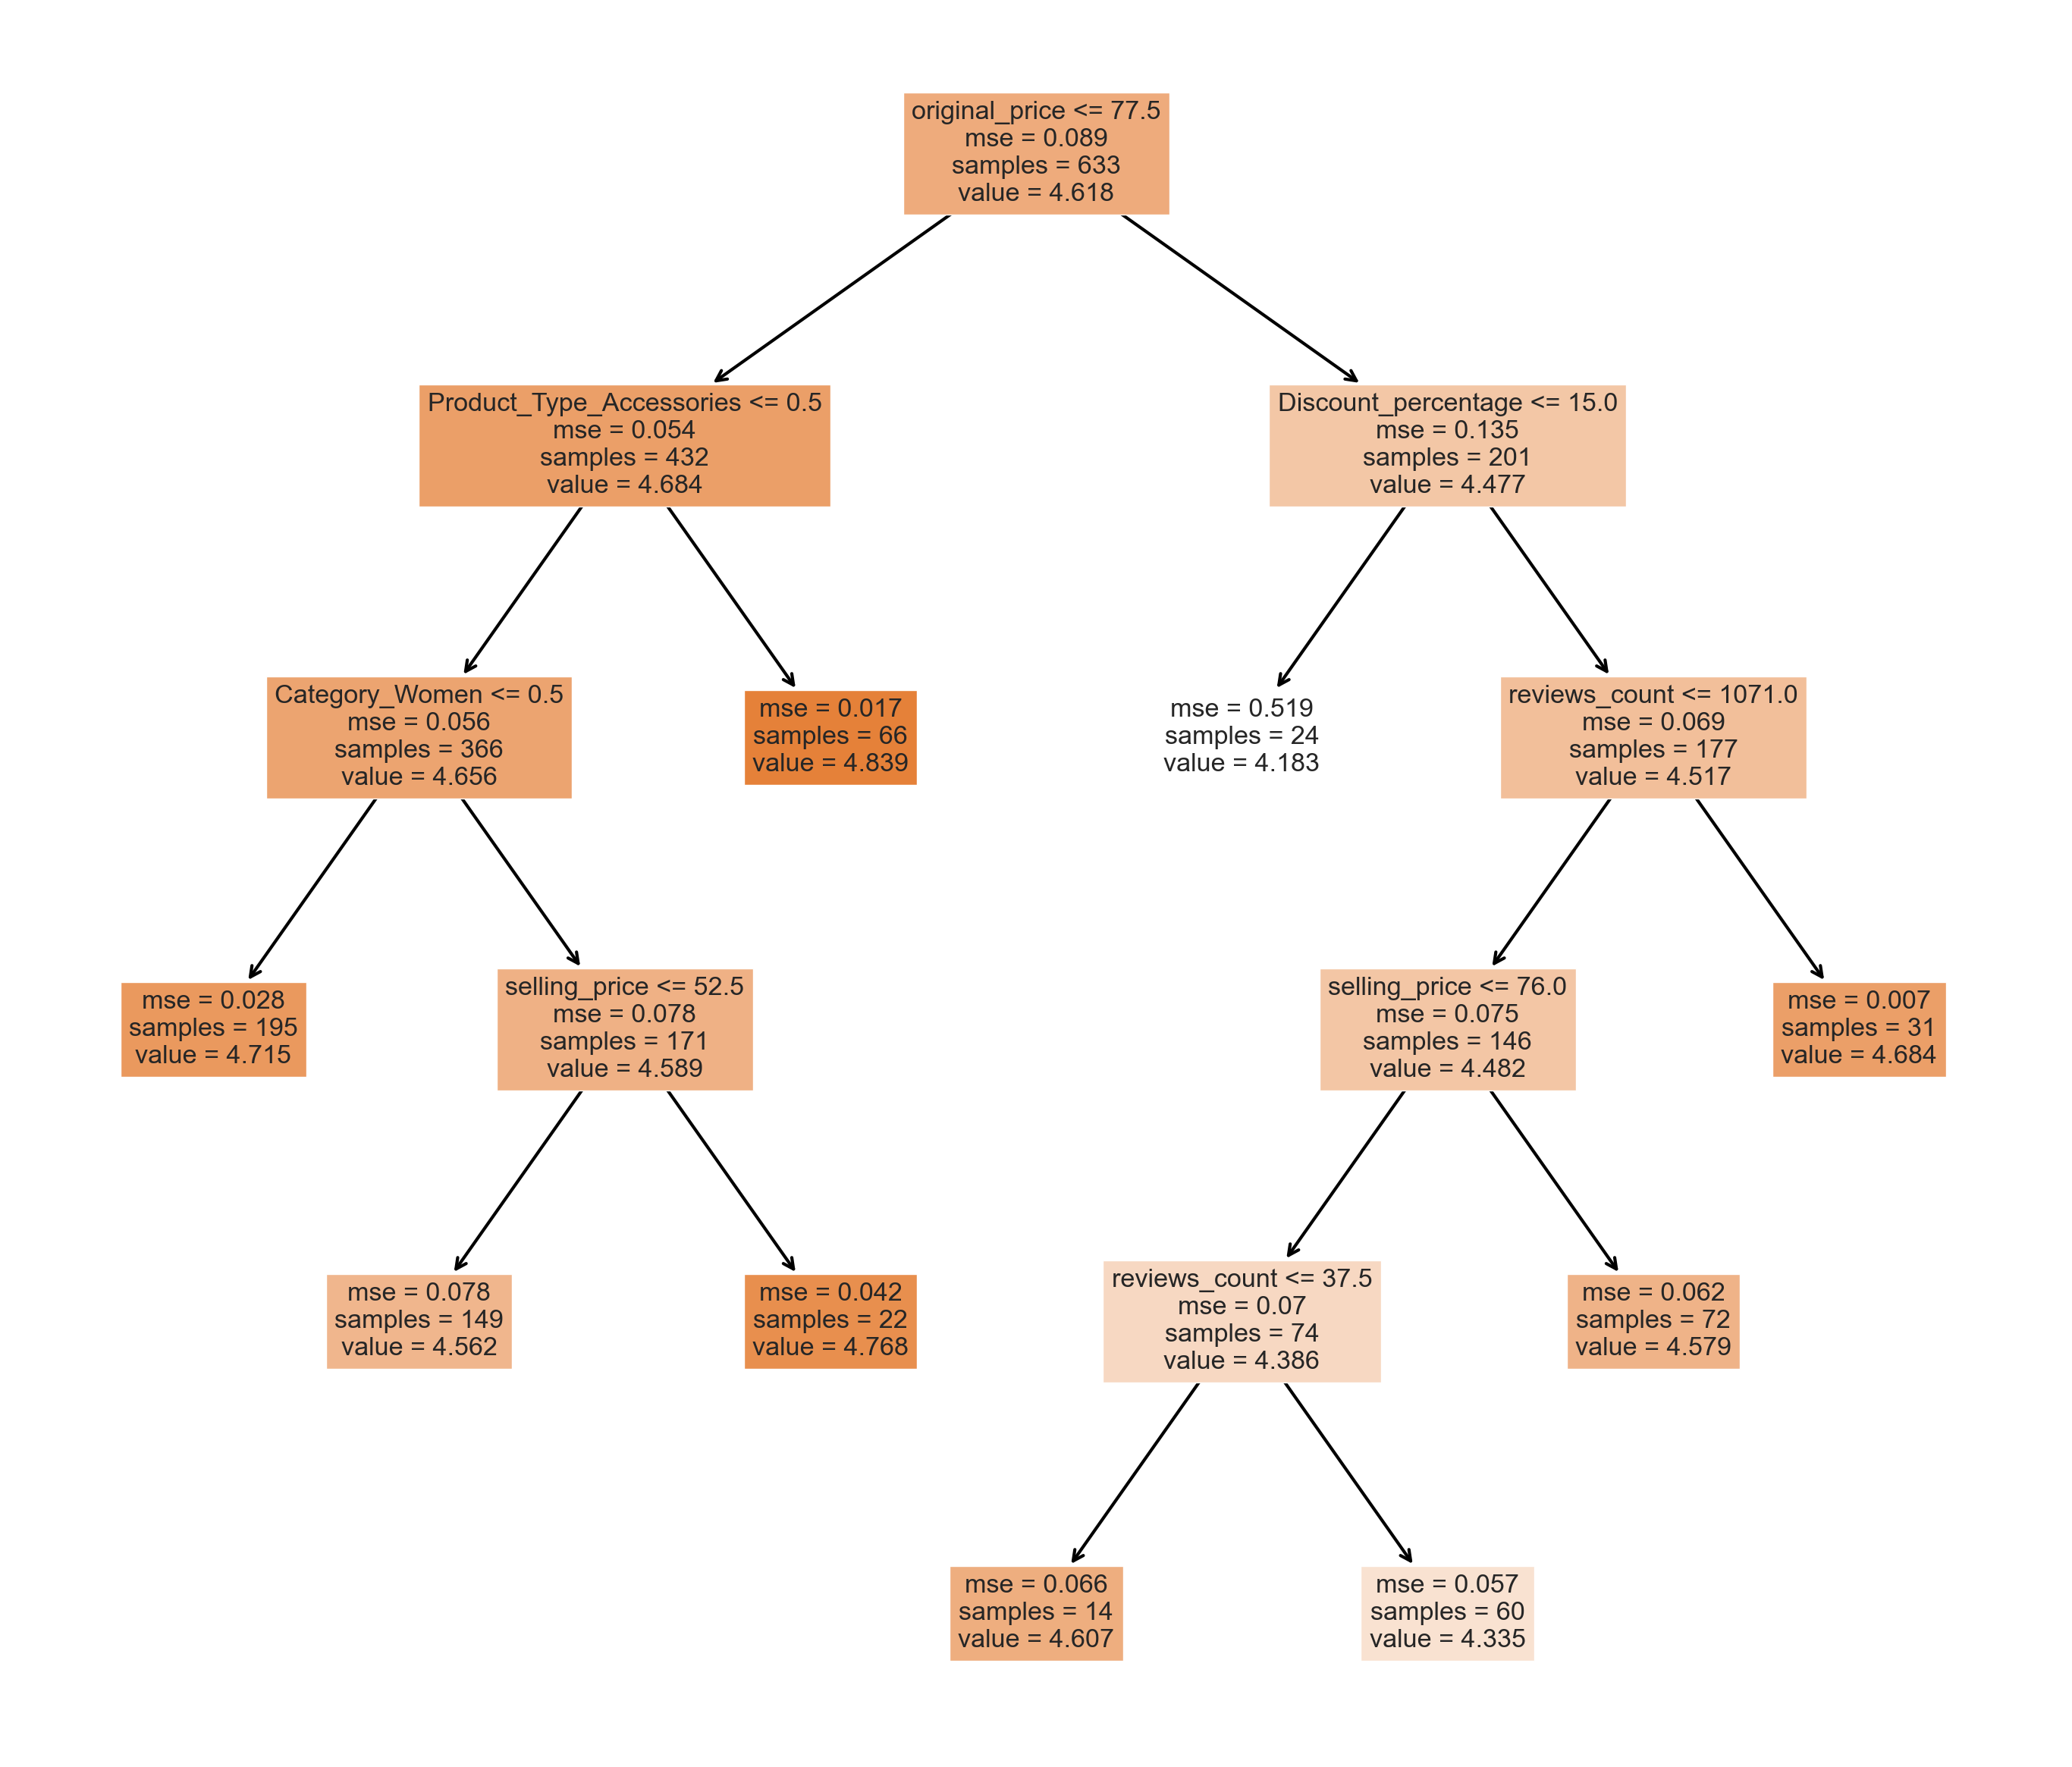

In [65]:
fig = plt.figure(figsize=(35,30))
out = tree.plot_tree(dtr, feature_names=feats,filled=True)


for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [60]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p.strip('()'))
        rules += [rule]
        
    return rules

In [61]:
clustering_df = x_train.copy()
clustering_df['LabelOfCluster'] = -1

In [62]:
rules = get_rules(dtr, feats, None)
for r in rules:
    print(r)

original_price <= 77.5 & Product_Type_Accessories <= 0.5 & Category_Women <= 0.5
original_price <= 77.5 & Product_Type_Accessories <= 0.5 & Category_Women > 0.5 & selling_price <= 52.5
original_price > 77.5 & Discount_percentage > 15.0 & reviews_count <= 1071.0 & selling_price > 76.0
original_price <= 77.5 & Product_Type_Accessories > 0.5
original_price > 77.5 & Discount_percentage > 15.0 & reviews_count <= 1071.0 & selling_price <= 76.0 & reviews_count > 37.5
original_price > 77.5 & Discount_percentage > 15.0 & reviews_count > 1071.0
original_price > 77.5 & Discount_percentage <= 15.0
original_price <= 77.5 & Product_Type_Accessories <= 0.5 & Category_Women > 0.5 & selling_price > 52.5
original_price > 77.5 & Discount_percentage > 15.0 & reviews_count <= 1071.0 & selling_price <= 76.0 & reviews_count <= 37.5


In [67]:
# %%timeit
rules = get_rules(dtr, feats, None)
i=0
final_df = pd.DataFrame()
for r in rules:
    temp_df = clustering_df.query(r)
    temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
    final_df = final_df.append(temp_df)
    i=i+1

/Users/aryanchaudhary/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [68]:
final_df

,selling_price,original_price,reviews_count,Discount_percentage,color_Beige,color_Black,color_Blue,color_Brown,color_Burgundy,color_Gold,...,Category_Sportswear,Category_Swim,Category_Training,Category_Women,Product_Type_Accessories,Product_Type_Clothing,Product_Type_Shoes,availability_InStock,availability_OutOfStock,LabelOfCluster
631,28,35.0,11,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
124,32,40.0,30,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
342,21,30.0,46,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
531,48,60.0,1518,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
577,56,70.0,72,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,64,80.0,3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8
320,64,80.0,1,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8
809,68,85.0,15,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8
567,68,85.0,28,20.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8
